In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

%matplotlib inline

import xgboost as xgb
from xgboost import XGBRegressor, plot_importance

seed = np.random.seed(0)

In [2]:
df = pd.read_csv("xy.csv")

In [3]:
df

,X1,X2,y
0,1.297720,0.805921,0.298968
1,1.267323,0.799034,0.318134
2,1.236882,0.792169,0.337201
3,1.206317,0.785296,0.356121
4,1.175553,0.778385,0.374842
...,...,...,...
995,-0.771835,0.809153,0.202607
996,-0.770044,0.888314,0.212606
997,-0.768427,0.967673,0.222502
998,-0.766932,1.047105,0.232284


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1000 non-null   float64
 1   X2      1000 non-null   float64
 2   y       1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [5]:
df.shape

(1000, 3)

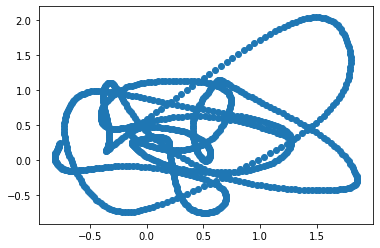

In [6]:
plt.scatter(x=df.X1,y=df.y)
plt.show()

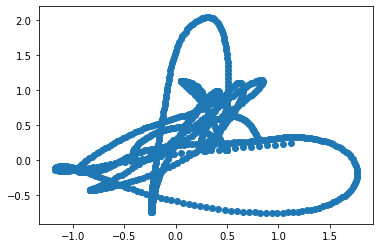

In [7]:
plt.scatter(x=df.X2,y=df.y)
plt.show()

In [8]:
df.corr()

,X1,X2,y
X1,1.000000,-0.138156,0.123867
X2,-0.138156,1.000000,0.298887
y,0.123867,0.298887,1.000000


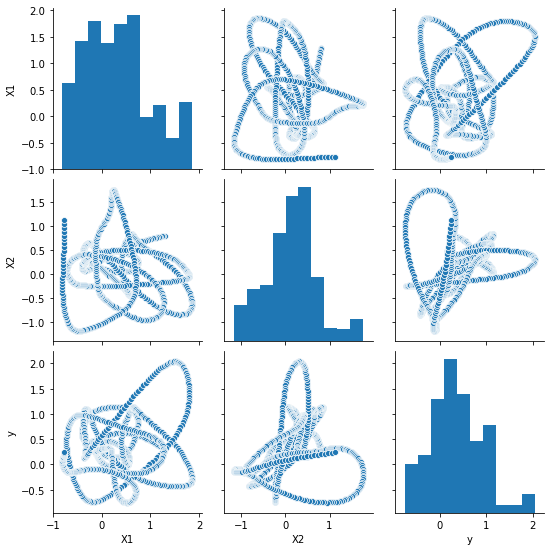

In [9]:
sns.pairplot(df)
plt.show()

In [10]:
X = df.iloc[:,0:2]
y = df.iloc[:,2]

In [11]:
X.values, y.values

(array([[ 1.29771982,  0.80592122],
        [ 1.26732348,  0.79903411],
        [ 1.23688169,  0.7921693 ],
        ...,
        [-0.76842684,  0.96767269],
        [-0.76693168,  1.047105  ],
        [-0.76550694,  1.12648565]]),
 array([ 2.98968300e-01,  3.18133656e-01,  3.37201487e-01,  3.56121029e-01,
         3.74841517e-01,  3.93312188e-01,  4.11482277e-01,  4.29303819e-01,
         4.46740049e-01,  4.63757001e-01,  4.80320708e-01,  4.96397203e-01,
         5.11952521e-01,  5.26952694e-01,  5.41348354e-01,  5.55028512e-01,
         5.67866778e-01,  5.79736761e-01,  5.90512069e-01,  6.00066312e-01,
         6.08273099e-01,  6.15026657e-01,  6.20303687e-01,  6.24101509e-01,
         6.26417443e-01,  6.27248808e-01,  6.26592924e-01,  6.24447111e-01,
         6.20824938e-01,  6.15804977e-01,  6.09482051e-01,  6.01950982e-01,
         5.93306591e-01,  5.83643702e-01,  5.73057136e-01,  5.61669070e-01,
         5.49711106e-01,  5.37442197e-01,  5.25121299e-01,  5.13007368e-01,
         

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [13]:
xgbmodel = XGBRegressor(objective='reg:squarederror',seed=seed,n_estimators=300)

In [14]:
xgbmodel.fit(X_train,y_train,eval_set=[(X_test,y_test)],eval_metric='rmse',early_stopping_rounds=10)

[0]	validation_0-rmse:0.539066
Will train until validation_0-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:0.509385
[2]	validation_0-rmse:0.483059
[3]	validation_0-rmse:0.459039
[4]	validation_0-rmse:0.438713
[5]	validation_0-rmse:0.420852
[6]	validation_0-rmse:0.405599
[7]	validation_0-rmse:0.3937
[8]	validation_0-rmse:0.381559
[9]	validation_0-rmse:0.370512
[10]	validation_0-rmse:0.362265
[11]	validation_0-rmse:0.356164
[12]	validation_0-rmse:0.351617
[13]	validation_0-rmse:0.347203
[14]	validation_0-rmse:0.342889
[15]	validation_0-rmse:0.338479
[16]	validation_0-rmse:0.335605
[17]	validation_0-rmse:0.333207
[18]	validation_0-rmse:0.331522
[19]	validation_0-rmse:0.329234
[20]	validation_0-rmse:0.328496
[21]	validation_0-rmse:0.326291
[22]	validation_0-rmse:0.324481
[23]	validation_0-rmse:0.322307
[24]	validation_0-rmse:0.320246
[25]	validation_0-rmse:0.318715
[26]	validation_0-rmse:0.31753
[27]	validation_0-rmse:0.315487
[28]	validation_0-rmse:0.311261
[29]	validation_0-rm

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=300,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [15]:
y_pred = xgbmodel.predict(X_test)

In [16]:
y_pred

array([ 0.41172686, -0.14586562,  0.66648704,  1.2682985 ,  0.86151534,
       -0.09081554,  0.6217119 , -0.12557852,  0.8908831 ,  0.60310704,
        0.38611436,  0.9666585 ,  0.06676048,  0.13116327,  0.25424325,
        0.55994606, -0.07846844,  0.45036826,  0.67723036,  0.58026624,
        0.52644926,  0.5544069 ,  1.4632151 ,  1.3294832 , -0.4616869 ,
        0.0658882 ,  0.5873603 ,  0.72199696, -0.11354315,  0.7032216 ,
        0.22173715,  0.37173414, -0.6223625 ,  0.19484821,  0.5839506 ,
       -0.06790608, -0.14589089, -0.3294707 , -0.18402886,  0.43445745,
       -0.02349406,  0.19385159,  0.22331995,  0.48887938,  0.19191757,
        0.06676048,  0.22173715,  0.4270281 ,  1.4170263 , -0.38907796,
        0.3937574 ,  0.5398408 ,  0.57109797,  0.8240777 , -0.22339112,
       -0.16864794,  0.42071486,  0.46429047,  0.302131  ,  1.3760519 ,
        0.32029688,  0.5463505 ,  0.38991463,  0.24834931,  0.8533628 ,
        0.68483543,  0.50087255,  1.7723274 ,  0.2614894 ,  0.43

In [17]:
mse = mean_squared_error(y_test,y_pred)
mse

0.07145029787380533

In [18]:
rmse = np.sqrt(mse)
rmse

0.26730188527918264

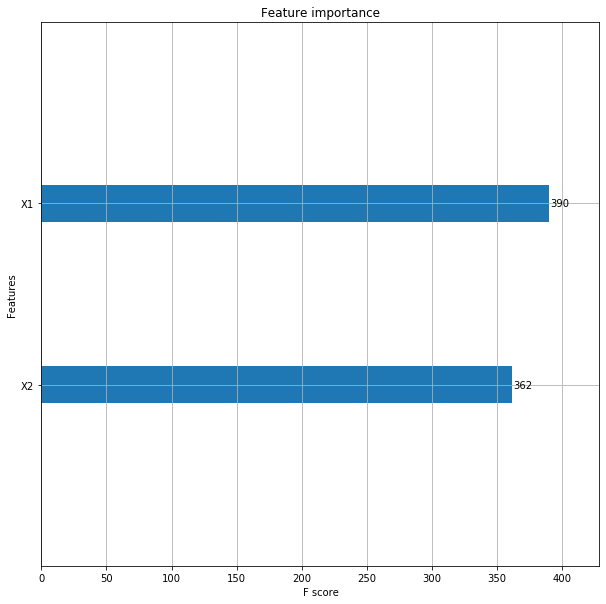

In [19]:
fig, ax = plt.subplots(figsize=(10,10))
xgb.plot_importance(xgbmodel, ax=ax)
plt.show()

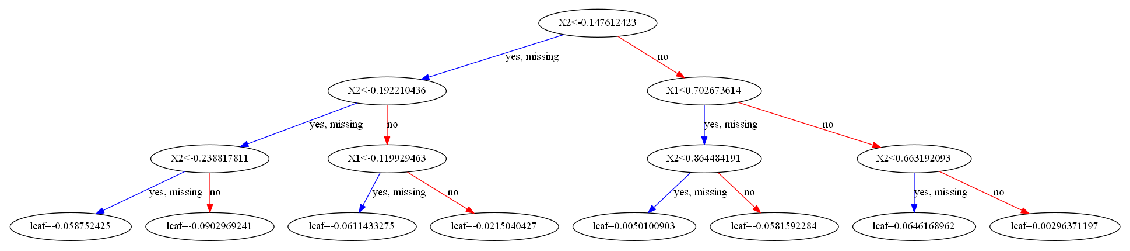

In [20]:
fig, ax = plt.subplots(figsize=(20,10))
xgb.plot_tree(xgbmodel, ax=ax)
plt.show()

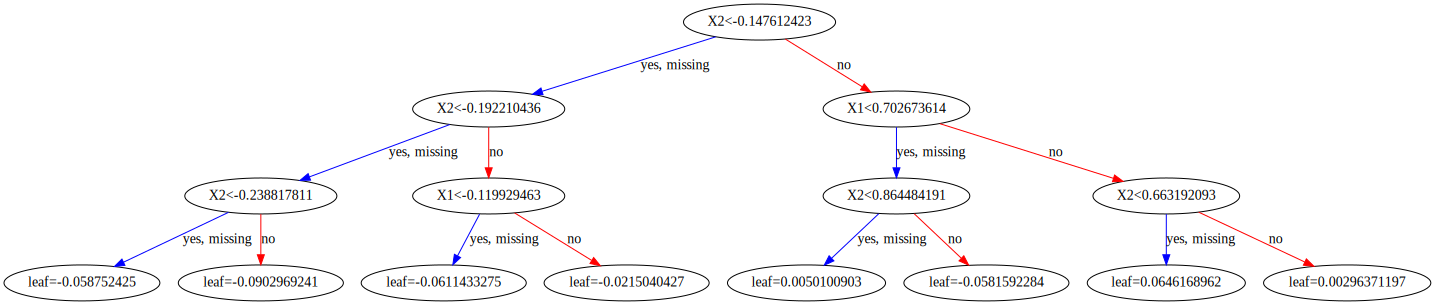

In [21]:
#fig, ax = plt.subplots(figsize=(20,10))
xgb.to_graphviz(xgbmodel)